In [1]:
import pandas as pd

import numpy as np

df = pd.read_excel("Commandes 2020-03-29_2022-03-21.xlsx")

#first we have to remove all employee orders, we can drop rows with employee emails (these were provided to me).
#NOTE!!! To preserve employee privacy, I have left out several lines in this version, one for each employee.
df.drop(index=df[df['E-mail'] == 'john.smith@example.com'].index, inplace=True) #This is an example!

#we flip the data so that the date is in ascending order and reset the index
df = df.reindex(index=df.index[::-1])
df = df.reset_index()
df['E-mail'] = pd.factorize(df['E-mail'])[0]
df


,index,Date commandé,No de commande,E-mail,Adresse (Livraison),Code postal (Livraison),Ville (Livraison),Point de collecte,ID point de collecte,Total payé,SKU,Nom du produit,Categorie,Quantité,Prix du produit,Code de coupon,Réduction
0,346180,2020-03-29 16:44:04,664,0,1-5365 16e Avenue,H1X 2S3,Montreal,NaN,NaN,43.84,PQ0211,Grand Panier,"Panier,Panier principal",1.0,40.00,NaN,NaN
1,346179,2020-03-30 10:23:53,665,1,1240 Beaubien Est,H2S 1T7,Montréak,NaN,NaN,34.12,False,NaN,NaN,1.0,30.00,NaN,NaN
2,346178,2020-03-30 10:55:52,666,2,5880 de bordeaux,H2G 2R4,Montréal,NaN,NaN,34.12,False,NaN,NaN,1.0,30.00,NaN,NaN
3,346177,2020-03-30 11:19:59,667,3,5257 Rue Fabre,H2J 3W6,Montreal,NaN,NaN,49.84,pourboire-01,Pourboire,Non classé,1.0,6.00,NaN,NaN
4,346176,2020-03-30 11:19:59,667,3,5257 Rue Fabre,H2J 3W6,Montreal,NaN,NaN,49.84,PQ0211,Grand Panier,"Panier,Panier principal",1.0,40.00,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
338278,4,2022-03-21 22:28:27,51727,3915,5638 Avenue De Lorimier,H2G 2N6,Montréal,NaN,NaN,190.75,PQ0552,Zucchinis,"Produit unité,Légumes,Zucchinis, piments et au...",1.0,6.95,NaN,NaN
338279,3,2022-03-21 22:28:27,51727,3915,5638 Avenue De Lorimier,H2G 2N6,Montréal,NaN,NaN,190.75,PQ0344,Fèves vertes,"Produit unité,Légumes,Fèves, poireaux et artic...",1.0,3.95,NaN,NaN
338280,2,2022-03-21 22:28:27,51727,3915,5638 Avenue De Lorimier,H2G 2N6,Montréal,NaN,NaN,190.75,PQ0555,Concombre anglais,"Produit unité,Légumes,Tomates, concombres et a...",1.0,2.75,NaN,NaN
338281,1,2022-03-21 22:28:27,51727,3915,5638 Avenue De Lorimier,H2G 2N6,Montréal,NaN,NaN,190.75,PQ0499,Tomates classique,"Produit unité,Légumes,Tomates, concombres et a...",1.0,4.50,NaN,NaN


In [2]:
#In the above data frame we can see that the item categories are sort of hierarchical - Oeufs are inside Epiceries which are
#inside Produit Unite.
#We will do some heavy duty data cleaning to reduce and clarify product categories.
#some deciciouns here will be obvious (e.g. citrus in fruit) but some will
#be a bit editorial (e.g. should oil and vinager be a category - I said no). Keeping in mind that the company is focused
#on sales from Jean Talon market
categories =  pd.get_dummies(df['Categorie'].explode()).sum(level=0)
categories


categories['Vegetables'] = categories['Produit unité,Légumes'] + categories['Produit unité,Légumes,Ail et oignons'] + categories['Produit unité,Légumes,Anti-gaspillage']\
+ categories['Produit unité,Légumes,Brocolis, choux, céleris et asperges'] + categories['Produit unité,Légumes,Brocolis, choux, céleris et asperges,Anti-gaspillage']\
+ categories['Produit unité,Légumes,Champignons'] + categories['Produit unité,Légumes,Citrouilles et courges'] + categories['Produit unité,Légumes,Fines herbes']\
+ categories['Produit unité,Légumes,Fèves, poireaux et artichauts'] + categories['Produit unité,Légumes,Laitues et pousses'] + categories['Produit unité,Légumes,Laitues et pousses,Anti-gaspillage']\
+ categories['Produit unité,Légumes,Légumes-racines'] + categories['Produit unité,Légumes,Pommes de terre et autres tubercules'] + categories['Produit unité,Légumes,Pommes de terre et autres tubercules,Anti-gaspillage']\
+ categories['Produit unité,Légumes,Tomates, concombres et avocats'] + categories['Produit unité,Légumes,Tomates, concombres et avocats,Anti-gaspillage'] + categories['Produit unité,Légumes,Zucchinis, piments et aubergines']\
+ categories['Produit unité,Légumes,Zucchinis, piments et aubergines,Anti-gaspillage']
categories = categories.drop(columns=['Produit unité,Légumes', 'Produit unité,Légumes,Ail et oignons', 'Produit unité,Légumes,Anti-gaspillage', 'Produit unité,Légumes,Brocolis, choux, céleris et asperges',
                                     'Produit unité,Légumes,Brocolis, choux, céleris et asperges,Anti-gaspillage', 'Produit unité,Légumes,Champignons', 'Produit unité,Légumes,Citrouilles et courges', 'Produit unité,Légumes,Fines herbes',
                                     'Produit unité,Légumes,Fèves, poireaux et artichauts', 'Produit unité,Légumes,Laitues et pousses', 'Produit unité,Légumes,Laitues et pousses,Anti-gaspillage', 'Produit unité,Légumes,Légumes-racines',
                                     'Produit unité,Légumes,Pommes de terre et autres tubercules', 'Produit unité,Légumes,Pommes de terre et autres tubercules,Anti-gaspillage', 'Produit unité,Légumes,Tomates, concombres et avocats',
                                     'Produit unité,Légumes,Tomates, concombres et avocats,Anti-gaspillage', 'Produit unité,Légumes,Zucchinis, piments et aubergines', 'Produit unité,Légumes,Zucchinis, piments et aubergines,Anti-gaspillage'])

categories['Fruits'] = categories['Produit unité,Fruits'] + categories['Produit unité,Fruits,Agrumes'] + categories['Produit unité,Fruits,Bananes, kiwi et fruits exotiques'] + categories['Produit unité,Fruits,Noel']\
+ categories['Produit unité,Fruits,Pommes et poires'] + categories['Produit unité,Fruits,Raisins et cerise'] 
categories = categories.drop(columns=['Produit unité,Fruits', 'Produit unité,Fruits,Agrumes', 'Produit unité,Fruits,Bananes, kiwi et fruits exotiques', 'Produit unité,Fruits,Noel', 'Produit unité,Fruits,Pommes et poires', 'Produit unité,Fruits,Raisins et cerise'])


categories['Fish and Seafood'] = categories['Poisson,Produit unité,Produits de la mer'] + categories['Produit unité,Poissonnerie,Autres produits de la mer'] + categories['Produit unité,Poissonnerie,Autres produits de la mer,Noel'] + categories['Produit unité,Poissonnerie,Fruits de mer']\
+ categories['Produit unité,Poissonnerie,Fruits de mer,Noel'] + categories['Produit unité,Poissonnerie,Poissons congelés'] + categories['Produit unité,Poissonnerie,Poissons frais'] + categories['Produit unité,Produits de la mer,Autres produits de la mer'] + categories['Produit unité,Produits de la mer,Fruits de mer']\
+ categories['Produit unité,Produits de la mer,Poisson'] + categories['Autres produits de la mer,Produit unité,Produits de la mer'] + categories['Fruits de mer,Produit unité,Produits de la mer']
categories = categories.drop(columns=['Poisson,Produit unité,Produits de la mer', 'Produit unité,Poissonnerie,Autres produits de la mer', 'Produit unité,Poissonnerie,Autres produits de la mer,Noel', 'Produit unité,Poissonnerie,Fruits de mer', 'Produit unité,Poissonnerie,Fruits de mer,Noel',
                                      'Produit unité,Poissonnerie,Poissons congelés', 'Produit unité,Poissonnerie,Poissons frais', 'Produit unité,Produits de la mer,Autres produits de la mer', 'Produit unité,Produits de la mer,Fruits de mer', 'Produit unité,Produits de la mer,Poisson', 'Autres produits de la mer,Produit unité,Produits de la mer',
                                     'Fruits de mer,Produit unité,Produits de la mer'])

categories['Meat and charcuterie'] = categories['Autres viandes,Produit unité,Viandes'] + categories['Boeuf,Produit unité,Viandes'] + categories['Charcuterie,Pâté et rillette,Produit unité'] + categories['Charcuterie,Saucisses sèches et jambon,Produit unité'] + categories['Porc,Produit unité,Viandes']\
+ categories['Produit unité,Boucherie et Charcuterie,Autres viandes'] + categories['Produit unité,Boucherie et Charcuterie,Boeuf'] + categories['Produit unité,Boucherie et Charcuterie,Porc'] + categories['Produit unité,Boucherie et Charcuterie,Pâté et rillette'] + categories['Produit unité,Boucherie et Charcuterie,Pâté et rillette,Noel']\
+ categories['Produit unité,Boucherie et Charcuterie,Saucisses'] + categories['Produit unité,Boucherie et Charcuterie,Saucisses sèches et jambon'] +  categories['Produit unité,Boucherie et Charcuterie,Volaille'] +  categories['Saucisses,Produit unité,Viandes'] + categories['Produit unité,Viandes,Autres viandes']\
+ categories['Produit unité,Viandes,Boeuf'] + categories['Produit unité,Viandes,Porc'] +  categories['Produit unité,Viandes,Saucisses'] + categories['Produit unité,Viandes,Volaille'] + categories['Produit unité,Charcuterie,Pâté et rillette'] + categories['Produit unité,Charcuterie,Saucisses sèches et jambon'] + categories['Volaille,Produit unité,Viandes']

categories = categories.drop(columns=['Autres viandes,Produit unité,Viandes', 'Boeuf,Produit unité,Viandes', 'Charcuterie,Pâté et rillette,Produit unité', 'Charcuterie,Saucisses sèches et jambon,Produit unité', 'Porc,Produit unité,Viandes', 'Produit unité,Boucherie et Charcuterie,Autres viandes', 'Produit unité,Boucherie et Charcuterie,Boeuf',
                                     'Produit unité,Boucherie et Charcuterie,Porc', 'Produit unité,Boucherie et Charcuterie,Pâté et rillette', 'Produit unité,Boucherie et Charcuterie,Pâté et rillette,Noel', 'Produit unité,Boucherie et Charcuterie,Saucisses', 'Produit unité,Boucherie et Charcuterie,Saucisses sèches et jambon',
                                     'Produit unité,Boucherie et Charcuterie,Volaille', 'Saucisses,Produit unité,Viandes', 'Produit unité,Viandes,Autres viandes', 'Produit unité,Viandes,Boeuf', 'Produit unité,Viandes,Porc', 'Produit unité,Viandes,Saucisses', 'Produit unité,Viandes,Volaille', 'Produit unité,Charcuterie,Pâté et rillette', 'Produit unité,Charcuterie,Saucisses sèches et jambon',
                                     'Volaille,Produit unité,Viandes'])

categories['Bread and baked goods'] = categories['Boulangerie,Pain,Produit unité'] + categories['Boulangerie,Viennoiserie,Produit unité'] + categories['Produit unité,Boulangerie et Pâtisserie,Autres pains'] + categories['Produit unité,Boulangerie et Pâtisserie,Autres pains,Noel'] + categories['Produit unité,Boulangerie et Pâtisserie,Pains']\
+ categories['Produit unité,Boulangerie et Pâtisserie,Pâtisserie et gâteaux'] + categories['Produit unité,Boulangerie et Pâtisserie,Pâtisserie et gâteaux,Noel'] + categories['Produit unité,Boulangerie et Pâtisserie,Tartes'] + categories['Produit unité,Boulangerie et Pâtisserie,Tartes,Noel'] + categories['Produit unité,Boulangerie et Pâtisserie,Viennoiserie']\
+ categories['Produit unité,Boulangerie,Pain'] + categories['Produit unité,Boulangerie,Viennoiserie'] + categories['Desserts,Pâtisserie et gâteau,Produit unité'] + categories['Desserts,Tarte,Produit unité'] + categories['Produit unité,Desserts,Pâtisserie et gâteau'] + categories['Produit unité,Desserts,Tarte']
categories = categories.drop(columns=['Boulangerie,Pain,Produit unité', 'Boulangerie,Viennoiserie,Produit unité', 'Produit unité,Boulangerie et Pâtisserie,Autres pains', 'Produit unité,Boulangerie et Pâtisserie,Autres pains,Noel', 'Produit unité,Boulangerie et Pâtisserie,Pains', 'Produit unité,Boulangerie et Pâtisserie,Pâtisserie et gâteaux',
                                      'Produit unité,Boulangerie et Pâtisserie,Pâtisserie et gâteaux,Noel', 'Produit unité,Boulangerie et Pâtisserie,Tartes', 'Produit unité,Boulangerie et Pâtisserie,Tartes,Noel', 'Produit unité,Boulangerie et Pâtisserie,Viennoiserie', 'Produit unité,Boulangerie,Pain', 'Produit unité,Boulangerie,Viennoiserie', 'Desserts,Pâtisserie et gâteau,Produit unité',
                                     'Desserts,Tarte,Produit unité', 'Produit unité,Desserts,Pâtisserie et gâteau', 'Produit unité,Desserts,Tarte'])

categories['Dairy and Cheese Products'] = categories['Fromage,Produit unité,Produits laitiers'] + categories['Fromage,Pâte ferme,Produit unité'] + categories['Fromage,Pâte molle,Produit unité'] + categories['Fromage,Pâte semi-ferme,Produit unité'] + categories['Kit,Fromagerie et Produits laitiers,Fromages à cuisiner'] + categories['Lait et Crème,Produit unité,Produits laitiers']\
+ categories['Produit unité,Fromage,Pâte ferme'] + categories['Produit unité,Fromage,Pâte molle'] + categories['Produit unité,Fromage,Pâte semi-ferme'] + categories['Produit unité,Fromagerie et Produits laitiers'] + categories['Produit unité,Fromagerie et Produits laitiers,Beurres'] + categories['Produit unité,Fromagerie et Produits laitiers,Cheddars']\
+ categories['Produit unité,Fromagerie et Produits laitiers,Fromages à cuisiner'] + categories['Produit unité,Fromagerie et Produits laitiers,Laits et crèmes'] + categories['Produit unité,Fromagerie et Produits laitiers,Planches'] + categories['Produit unité,Fromagerie et Produits laitiers,Pâte ferme'] + categories['Produit unité,Fromagerie et Produits laitiers,Pâte fraiche et pâte persillé']\
+ categories['Produit unité,Fromagerie et Produits laitiers,Pâte molle'] + categories['Produit unité,Fromagerie et Produits laitiers,Pâte molle,Noel'] + categories['Produit unité,Fromagerie et Produits laitiers,Pâte semi-ferme'] + categories['Produit unité,Fromagerie et Produits laitiers,Yogourts'] + categories['Beurre,Produit unité,Produits laitiers']\
+ categories['Produit unité,Produits laitiers,Beurre'] + categories['Produit unité,Produits laitiers,Lait et Crème'] + categories['Yogourt,Produit unité,Produits laitiers'] + categories['Produit unité,Produits laitiers,Yogourt']

categories = categories.drop(columns=['Fromage,Produit unité,Produits laitiers', 'Fromage,Pâte ferme,Produit unité', 'Fromage,Pâte molle,Produit unité', 'Fromage,Pâte semi-ferme,Produit unité', 'Kit,Fromagerie et Produits laitiers,Fromages à cuisiner', 'Lait et Crème,Produit unité,Produits laitiers', 'Produit unité,Fromage,Pâte ferme', 'Produit unité,Fromage,Pâte molle',
                                      'Produit unité,Fromage,Pâte semi-ferme', 'Produit unité,Fromagerie et Produits laitiers', 'Produit unité,Fromagerie et Produits laitiers,Beurres', 'Produit unité,Fromagerie et Produits laitiers,Cheddars', 'Produit unité,Fromagerie et Produits laitiers,Fromages à cuisiner', 'Produit unité,Fromagerie et Produits laitiers,Laits et crèmes',
                                      'Produit unité,Fromagerie et Produits laitiers,Planches', 'Produit unité,Fromagerie et Produits laitiers,Pâte ferme', 'Produit unité,Fromagerie et Produits laitiers,Pâte fraiche et pâte persillé', 'Produit unité,Fromagerie et Produits laitiers,Pâte molle', 'Produit unité,Fromagerie et Produits laitiers,Pâte molle,Noel',
                                      'Produit unité,Fromagerie et Produits laitiers,Pâte semi-ferme', 'Produit unité,Fromagerie et Produits laitiers,Yogourts', 'Beurre,Produit unité,Produits laitiers', 'Produit unité,Produits laitiers,Beurre', 'Produit unité,Produits laitiers,Lait et Crème', 'Yogourt,Produit unité,Produits laitiers', 'Produit unité,Produits laitiers,Yogourt'])

categories['Prepared Meals and Dips'] = categories['Produit unité,Plats préparés,Autres Repas'] + categories['Produit unité,Plats préparés,Autres Repas,Garde-manger,Tofu et alternatives vegan'] + categories['Produit unité,Plats préparés,Pizzas, pâtés et quiches'] + categories['Produit unité,Plats préparés,Plats principaux'] + categories['Produit unité,Plats préparés,Soupes et trempettes']\
+ categories['Produit unité,Prêt-à-manger salé,Autres Repas'] +  categories['Produit unité,Prêt-à-manger salé,Pâté et Quiche'] + categories['Autre Repas,Prêt-à-manger salé,Produit unité'] + categories['Prêt-à-manger salé,Soupe,Produit unité'] + categories['Pâté et Quiche,Prêt-à-manger salé,Produit unité'] + categories['Produit unité,Prêt-à-manger salé,Trempettes']\
+ categories['Prêt-à-manger salé,Trempettes,Produit unité']

categories = categories.drop(columns=['Produit unité,Plats préparés,Autres Repas', 'Produit unité,Plats préparés,Autres Repas,Garde-manger,Tofu et alternatives vegan', 'Produit unité,Plats préparés,Pizzas, pâtés et quiches', 'Produit unité,Plats préparés,Plats principaux', 'Produit unité,Plats préparés,Soupes et trempettes', 'Produit unité,Prêt-à-manger salé,Autres Repas',
                                     'Produit unité,Prêt-à-manger salé,Pâté et Quiche', 'Autre Repas,Prêt-à-manger salé,Produit unité', 'Prêt-à-manger salé,Soupe,Produit unité', 'Pâté et Quiche,Prêt-à-manger salé,Produit unité', 'Produit unité,Prêt-à-manger salé,Trempettes', 'Prêt-à-manger salé,Trempettes,Produit unité'])

categories['Plants, Flowers and Garden'] = categories['Bouquets,Plantes et fleurs,Produit unité'] + categories['Plantes et fleurs,Potager et Jardin,Produit unité'] + categories['Plantes et fleurs,Semis,Produit unité'] + categories['Plantes,Plantes et fleurs,Produit unité'] + categories['Produit unité,Plantes et fleurs,Bouquets']\
+ categories['Produit unité,Plantes et fleurs,Outils de jardinage'] + categories['Produit unité,Plantes et fleurs,Plantes'] + categories['Produit unité,Plantes et fleurs,Potager et Jardin'] + categories['Produit unité,Plantes et fleurs,Semis'] + categories['Outils de jardinage,Plantes et fleurs,Produit unité']

categories = categories.drop(columns=['Bouquets,Plantes et fleurs,Produit unité', 'Plantes et fleurs,Potager et Jardin,Produit unité', 'Plantes et fleurs,Semis,Produit unité', 'Plantes,Plantes et fleurs,Produit unité', 'Produit unité,Plantes et fleurs,Bouquets', 'Produit unité,Plantes et fleurs,Outils de jardinage', 'Produit unité,Plantes et fleurs,Plantes',
                                     'Produit unité,Plantes et fleurs,Potager et Jardin', 'Produit unité,Plantes et fleurs,Semis', 'Outils de jardinage,Plantes et fleurs,Produit unité'])

categories['Pantry/Groceries'] = categories['Produit unité,Garde-manger,Olives et légumes marinés'] + categories['Produit unité,Garde-manger,Chips et craquelins'] + categories['Produit unité,Garde-manger,Chips et craquelins,Noel'] + categories['Produit unité,Garde-manger,Condiments'] + categories['Produit unité,Garde-manger,Condiments,Noel'] + categories['Produit unité,Garde-manger,Céréales et noix']\
+ categories['Produit unité,Garde-manger,Thés et cafés'] + categories['Produit unité,Garde-manger,Tofu et alternatives vegan'] + categories['Produit unité,Indispensables pour la cuisine,Ingrédients pour la cuisson,Garde-manger,Tofu et alternatives vegan'] + categories['Alternatives végé et vegan,Produit unité'] + categories['Condiments,Produit unité,Épiceries'] + categories['Produit unité,Épiceries,Olives']\
+ categories['Céréales,Produit unité,Épiceries'] + categories['Produit unité,Épiceries,Thé et Café'] + categories['Huile et Vinaigre,Produit unité,Épiceries'] + categories['Ingrédients pour la cuisson,Produit unité,Épiceries'] + categories['Olives,Produit unité,Épiceries'] + categories['Produit unité,Alternatives végé et vegan'] + categories['Produit unité,Indispensables pour la cuisine,Farines et sucres']\
+ categories['Produit unité,Indispensables pour la cuisine,Huiles et vinaigres'] + categories['Thé et Café,Produit unité,Épiceries'] + categories['Épices,Produit unité,Épiceries'] + categories['Produit unité,Épiceries'] + categories['Farine et sucre,Produit unité,Épiceries'] + categories['Produit unité,Indispensables pour la cuisine,Épices'] + categories['Produit unité,Épiceries,Céréales']\
+ categories['Produit unité,Indispensables pour la cuisine,Ingrédients pour la cuisson'] + categories['Produit unité,Épiceries,Huile et Vinaigre'] + categories['Produit unité,Épiceries,Épices'] + categories['Produit unité,Épiceries,Ingrédients pour la cuisson'] + categories['Produit unité,Pâtes, Sauces, Riz et Graines,Pâtes fraîches'] + categories['Produit unité,Pâtes, Sauces, Riz et Graines,Pâtes sèches']\
+ categories['Produit unité,Pâtes, Sauces, Riz et Graines,Riz, graines et légumineuses'] + categories['Produit unité,Pâtes, Sauces, Riz et Graines,Sauces'] + categories['Produit unité,Épiceries,Condiments'] + categories['Produit unité,Épiceries,Farine et sucre'] + categories['Produit unité,Épiceries,Pâtes et sauces'] + categories['Pâtes et sauces,Produit unité,Épiceries']

categories = categories.drop(columns=['Produit unité,Garde-manger,Olives et légumes marinés', 'Produit unité,Garde-manger,Chips et craquelins', 'Produit unité,Garde-manger,Chips et craquelins,Noel', 'Produit unité,Garde-manger,Condiments', 'Produit unité,Garde-manger,Condiments,Noel', 'Produit unité,Garde-manger,Céréales et noix', 'Produit unité,Garde-manger,Thés et cafés',
                                     'Produit unité,Garde-manger,Tofu et alternatives vegan', 'Produit unité,Indispensables pour la cuisine,Ingrédients pour la cuisson,Garde-manger,Tofu et alternatives vegan', 'Alternatives végé et vegan,Produit unité', 'Condiments,Produit unité,Épiceries', 'Produit unité,Épiceries,Olives', 'Céréales,Produit unité,Épiceries', 'Produit unité,Épiceries,Thé et Café',
                                     'Huile et Vinaigre,Produit unité,Épiceries', 'Ingrédients pour la cuisson,Produit unité,Épiceries', 'Olives,Produit unité,Épiceries', 'Produit unité,Alternatives végé et vegan', 'Produit unité,Indispensables pour la cuisine,Farines et sucres', 'Produit unité,Indispensables pour la cuisine,Huiles et vinaigres', 'Thé et Café,Produit unité,Épiceries',
                                     'Épices,Produit unité,Épiceries', 'Produit unité,Épiceries', 'Farine et sucre,Produit unité,Épiceries', 'Produit unité,Indispensables pour la cuisine,Épices', 'Produit unité,Épiceries,Céréales', 'Produit unité,Indispensables pour la cuisine,Ingrédients pour la cuisson',
                                     'Produit unité,Épiceries,Huile et Vinaigre', 'Produit unité,Épiceries,Épices', 'Produit unité,Épiceries,Ingrédients pour la cuisson', 'Produit unité,Pâtes, Sauces, Riz et Graines,Pâtes fraîches', 'Produit unité,Pâtes, Sauces, Riz et Graines,Pâtes sèches', 'Produit unité,Pâtes, Sauces, Riz et Graines,Riz, graines et légumineuses',
                                     'Produit unité,Pâtes, Sauces, Riz et Graines,Sauces', 'Produit unité,Épiceries,Condiments', 'Produit unité,Épiceries,Farine et sucre', 'Produit unité,Épiceries,Pâtes et sauces', 'Pâtes et sauces,Produit unité,Épiceries'])

categories['Snacks'] = categories['Produit unité,Collations, Tartinades, Chocolats et Bonbons,Chocolats et bonbons,Noel'] + categories['Produit unité,Collations, Tartinades, Chocolats et Bonbons,Chocolats et bonbons'] + categories['Produit unité,Collations, Tartinades, Chocolats et Bonbons,Collations et biscuits'] + categories['Collations,Produit unité,Épiceries']\
+ categories['Confiseries,Produit unité,Épiceries'] + categories['Produit unité,Épiceries,Collations'] + categories['Produit unité,Épiceries,Confiseries']

categories = categories.drop(columns=['Produit unité,Collations, Tartinades, Chocolats et Bonbons,Chocolats et bonbons,Noel', 'Produit unité,Collations, Tartinades, Chocolats et Bonbons,Chocolats et bonbons', 'Produit unité,Collations, Tartinades, Chocolats et Bonbons,Collations et biscuits', 'Collations,Produit unité,Épiceries', 'Confiseries,Produit unité,Épiceries', 'Produit unité,Épiceries,Collations',
                                     'Produit unité,Épiceries,Confiseries'])

categories['Bulk'] = categories['Céréales,Produit unité,Vrac'] + categories['Noix,Produit unité,Vrac'] + categories['Produit unité,Vrac,Céréales'] + categories['Produit unité,Vrac,Noix'] + categories['Produit unité,Vrac,Riz, graines et légumineuses'] + categories['Produit unité,Épices,Vrac'] + categories['Riz, graines et légumineuses,Produit unité,Vrac'] + categories['Épices,Produit unité,Vrac']

categories = categories.drop(columns=['Céréales,Produit unité,Vrac', 'Noix,Produit unité,Vrac', 'Produit unité,Vrac,Céréales', 'Produit unité,Vrac,Noix', 'Produit unité,Vrac,Riz, graines et légumineuses', 'Produit unité,Épices,Vrac', 'Riz, graines et légumineuses,Produit unité,Vrac', 'Épices,Produit unité,Vrac'])

categories['Other products'] = categories['Autre,Produit unité'] + categories['Produit unité,Autre'] + categories['Produit unité,Autres'] + categories['Produit unité,Autres,Noel'] + categories['Noel,Produit unité'] + categories['Produit unité,Noel'] + categories['Produit unité']

categories = categories.drop(columns=['Autre,Produit unité', 'Produit unité,Autre', 'Produit unité,Autres', 'Produit unité,Autres,Noel', 'Noel,Produit unité', 'Produit unité,Noel', 'Produit unité'])

categories['Drinks'] = categories['Boisson,Produit unité,Épiceries'] + categories['Produit unité,Boissons'] + categories['Produit unité,Boissons,Garde-manger'] + categories['Produit unité,Épiceries,Boisson']

categories = categories.drop(columns=['Boisson,Produit unité,Épiceries', 'Produit unité,Boissons', 'Produit unité,Boissons,Garde-manger', 'Produit unité,Épiceries,Boisson'])

categories['Baskets/Paniers'] = categories['Panier cadeau'] + categories['Non classé,Panier,Panier saisonnier'] + categories['Panier découverte,Panier'] + categories['Panier découverte,Panier'] + categories['Panier principal'] + categories['Panier,Panier additionnel'] + categories['Panier,Panier principal'] + categories['Panier,Panier principal,Panier personnalisable'] + categories['Paniers de la semaine,Panier additionnel']\
+ categories['Paniers de la semaine,Panier principal'] + categories['Paniers préconçus,Panier additionnel'] + categories['Paniers préconçus,Panier découverte'] + categories['Paniers préconçus,Panier principal'] + categories['Entreprise']

categories = categories.drop(columns=['Panier cadeau', 'Non classé,Panier,Panier saisonnier', 'Panier découverte,Panier', 'Panier principal', 'Panier,Panier additionnel', 'Panier,Panier principal', 'Panier,Panier principal,Panier personnalisable', 'Paniers de la semaine,Panier additionnel', 'Paniers de la semaine,Panier principal', 'Paniers préconçus,Panier additionnel', 'Paniers préconçus,Panier découverte', 
                                      'Paniers préconçus,Panier principal', 'Entreprise'])

categories['Beauty and Body Products'] = categories['Produit unité,Beauté'] + categories['Produit unité,Produits pour le corps'] + categories['Produits pour le corps,Produit unité']

categories = categories.drop(columns=['Produit unité,Beauté', 'Produit unité,Produits pour le corps', 'Produits pour le corps,Produit unité'])

categories['Eggs'] = categories['Oeufs,Produit unité,Épiceries'] + categories['Produit unité,Indispensables pour la cuisine,Oeufs'] + categories['Produit unité,Épiceries,Oeufs']

categories = categories.drop(columns=['Oeufs,Produit unité,Épiceries', 'Produit unité,Indispensables pour la cuisine,Oeufs', 'Produit unité,Épiceries,Oeufs'])

categories['Honey, Syrups, Jams, Nut Butters'] = categories['Miel, confiture et tartinade,Produit unité,Épiceries'] + categories['Produit unité,Collations, Tartinades, Chocolats et Bonbons,Miels, confitures et tartinades'] + categories['Produit unité,Épiceries,Miel, confiture et tartinade']

categories = categories.drop(columns=['Miel, confiture et tartinade,Produit unité,Épiceries', 'Produit unité,Collations, Tartinades, Chocolats et Bonbons,Miels, confitures et tartinades', 'Produit unité,Épiceries,Miel, confiture et tartinade'])

categories['Household Products'] = categories['Produit unité,Maison'] + categories['Produit unité,Produits ménagers'] + categories['Produits ménagers,Produit unité'] + categories['Produits ménagers,Produit unité'] 
categories = categories.drop(columns=['Produit unité,Maison', 'Produit unité,Produits ménagers', 'Produits ménagers,Produit unité'])

#was instructed by contact at company to disregard gift cqrds. Some other categories are also not attached to prices -e.g. recette
categories = categories.drop(columns=['Carte cadeau', 'Non classé', 'Abonnement panier,Abonnement', 'Abonnement produit,Abonnement', 'Compose ta recette', 'Recette'])
print(categories.columns.tolist())
#~200 categories to 18 categories!
print(len(categories.columns.tolist()))

C:\Users\Oliver\AppData\Local\Temp/ipykernel_8368/1008441364.py:7: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  categories =  pd.get_dummies(df['Categorie'].explode()).sum(level=0)


['Vegetables', 'Fruits', 'Fish and Seafood', 'Meat and charcuterie', 'Bread and baked goods', 'Dairy and Cheese Products', 'Prepared Meals and Dips', 'Plants, Flowers and Garden', 'Pantry/Groceries', 'Snacks', 'Bulk', 'Other products', 'Drinks', 'Baskets/Paniers', 'Beauty and Body Products', 'Eggs', 'Honey, Syrups, Jams, Nut Butters', 'Household Products']
18


In [3]:
#we may come back to questions around coupons so I will still create the categories in this workbook.
df['coupons'] = df['Code de coupon']

df['coupons'] = ['bienvenue20' if x == 'bienvenue20'
                  else 'soleil10' if x == 'soleil10' else 0 for x in df['coupons']]

coupons = pd.get_dummies(df['coupons'])
coupons

,0,bienvenue20,soleil10
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
338278,1,0,0
338279,1,0,0
338280,1,0,0
338281,1,0,0


In [4]:
#attaching the 3 dataframes together for some later questions
df = df.join(categories)
df = df.join(coupons)

In [5]:
#what categories of items predict higher value customers?

#it doesn't make sense to use any rows where the product equals zero for the first question
df2 = df[df['Prix du produit'] != 0]
df2['Prix'] = df2['Prix du produit'] * df2['Quantité'] #multiplying the rows where there are multiple entries

category_key = categories.columns.tolist()  #list of prodcut categories

total_prices = []    

    
#for each category we sum all the price of all the rows that belong to it, and then append the sum to a list
for x in category_key: 
    total_prices.append(sum(df2['Prix'].loc[(df2[x] > 0)]))

#I forgot that floats aren't exact?!? So we round to ints
total_prices = [int(x) for x in total_prices]

#creating a dictionary with prices and items
print(total_prices)   
total_values = {}
for key in category_key:
    for value in total_prices:
        total_values[key] = value
        total_prices.remove(value)
        break 

print(total_values)
print(category_key)

#sorting the values from highest to lowest. Vegetables was number 1, not surprising!
import operator
sorted_values = sorted(total_values.items(), key=operator.itemgetter(1))

[525140, 285775, 126786, 287166, 112346, 171993, 67242, 25683, 120391, 16621, 28117, 18124, 33817, 369522, 4721, 35636, 23310, 2241]
{'Vegetables': 525140, 'Fruits': 285775, 'Fish and Seafood': 126786, 'Meat and charcuterie': 287166, 'Bread and baked goods': 112346, 'Dairy and Cheese Products': 171993, 'Prepared Meals and Dips': 67242, 'Plants, Flowers and Garden': 25683, 'Pantry/Groceries': 120391, 'Snacks': 16621, 'Bulk': 28117, 'Other products': 18124, 'Drinks': 33817, 'Baskets/Paniers': 369522, 'Beauty and Body Products': 4721, 'Eggs': 35636, 'Honey, Syrups, Jams, Nut Butters': 23310, 'Household Products': 2241}
['Vegetables', 'Fruits', 'Fish and Seafood', 'Meat and charcuterie', 'Bread and baked goods', 'Dairy and Cheese Products', 'Prepared Meals and Dips', 'Plants, Flowers and Garden', 'Pantry/Groceries', 'Snacks', 'Bulk', 'Other products', 'Drinks', 'Baskets/Paniers', 'Beauty and Body Products', 'Eggs', 'Honey, Syrups, Jams, Nut Butters', 'Household Products']


C:\Users\Oliver\AppData\Local\Temp/ipykernel_8368/121874845.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Prix'] = df2['Prix du produit'] * df2['Quantité'] #multiplying the rows where there are multiple entries


In [6]:
#Thought they might want to see what this looks like in 2022

df_2022 = df2.loc[(df2['Date commandé'] > '2022-01-01 00:00:00')]
df_2022

category_key_2022 = categories.columns.tolist()  #list of prodcut categories

total_prices_2022 = []    

    

for x in category_key_2022: 
    total_prices_2022.append(sum(df_2022['Prix'].loc[(df_2022[x] > 0)]))


total_prices_2022 = [int(x) for x in total_prices_2022]


print(total_prices_2022)   
total_values_2022 = {}
for key in category_key_2022:
    for value in total_prices_2022:
        total_values_2022[key] = value
        total_prices_2022.remove(value)
        break 

print(total_values_2022)


import operator
sorted_values_2022 = sorted(total_values_2022.items(), key=operator.itemgetter(1))
sorted_values_2022[:][::-1]

[97977, 45081, 20758, 50876, 18747, 30006, 12887, 2567, 28280, 2759, 0, 231, 5165, 27916, 474, 5499, 3368, 391]
{'Vegetables': 97977, 'Fruits': 45081, 'Fish and Seafood': 20758, 'Meat and charcuterie': 50876, 'Bread and baked goods': 18747, 'Dairy and Cheese Products': 30006, 'Prepared Meals and Dips': 12887, 'Plants, Flowers and Garden': 2567, 'Pantry/Groceries': 28280, 'Snacks': 2759, 'Bulk': 0, 'Other products': 231, 'Drinks': 5165, 'Baskets/Paniers': 27916, 'Beauty and Body Products': 474, 'Eggs': 5499, 'Honey, Syrups, Jams, Nut Butters': 3368, 'Household Products': 391}


[('Vegetables', 97977),
 ('Meat and charcuterie', 50876),
 ('Fruits', 45081),
 ('Dairy and Cheese Products', 30006),
 ('Pantry/Groceries', 28280),
 ('Baskets/Paniers', 27916),
 ('Fish and Seafood', 20758),
 ('Bread and baked goods', 18747),
 ('Prepared Meals and Dips', 12887),
 ('Eggs', 5499),
 ('Drinks', 5165),
 ('Honey, Syrups, Jams, Nut Butters', 3368),
 ('Snacks', 2759),
 ('Plants, Flowers and Garden', 2567),
 ('Beauty and Body Products', 474),
 ('Household Products', 391),
 ('Other products', 231),
 ('Bulk', 0)]

In [8]:
import statsmodels.api as sm

#Here we are going to ask what product categories predict higher value orders.

#For the Y we want just the order value which is the same for each row in a given order hence the 'mean' works
Ymean = df2.groupby('No de commande').mean()
Ymean = Ymean['Total payé']
#For the X we want the presence/absence of the product clipped at 1 . I chose to do this rather than count the instances 
#as the business question is about inducing customers to buy a product category.
Xmean = df2.groupby('No de commande').sum()
Xmean = Xmean[['Vegetables', 'Fruits', 'Fish and Seafood', 'Meat and charcuterie', 'Bread and baked goods', 
      'Dairy and Cheese Products', 'Prepared Meals and Dips', 'Plants, Flowers and Garden', 'Pantry/Groceries', 
      'Snacks', 'Bulk', 'Other products', 'Drinks', 'Baskets/Paniers', 'Beauty and Body Products', 'Eggs', 
      'Honey, Syrups, Jams, Nut Butters', 'Household Products']]
Xmean = Xmean.clip(upper=1)
Xmean = sm.add_constant(Xmean)


regr = sm.OLS(Ymean, Xmean).fit()

print(regr.summary())
#Not bad results!

C:\Users\Oliver\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
C:\Users\Oliver\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


                            OLS Regression Results                            
Dep. Variable:             Total payé   R-squared:                       0.434
Model:                            OLS   Adj. R-squared:                  0.434
Method:                 Least Squares   F-statistic:                     976.0
Date:                Thu, 19 May 2022   Prob (F-statistic):               0.00
Time:                        14:38:32   Log-Likelihood:            -1.1905e+05
No. Observations:               22900   AIC:                         2.381e+05
Df Residuals:                   22881   BIC:                         2.383e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

C:\Users\Oliver\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)


In [9]:
#now we are asking if product categories predict number of orders.

#For the Y we want the number of orders, we keep one row for each order then group by email and count.
df3 = df.drop_duplicates(subset=['No de commande'])
df3 = df3.groupby('E-mail').count()

df3 = df3.reset_index()

#For the X we group by email and order so that we can sum product categories for each order
df4 = df.groupby(['E-mail', 'No de commande']).sum()
df4 = df4.reset_index()
df4 = df4.drop_duplicates(['E-mail'])
df4 = df4.reset_index()

Ycount = df3['No de commande']

#For the X we want the presence/absence of the product clipped at 1 . I chose to do this rather than count the instances 
#as the business question is about inducing customers to buy a product category.
Xcount = df4[['Vegetables', 'Fruits', 'Fish and Seafood', 'Meat and charcuterie', 'Bread and baked goods', 
      'Dairy and Cheese Products', 'Prepared Meals and Dips', 'Plants, Flowers and Garden', 'Pantry/Groceries', 
      'Snacks', 'Drinks', 'Baskets/Paniers', 'Beauty and Body Products', 'Eggs', 
      'Honey, Syrups, Jams, Nut Butters', 'Household Products']]
Xcount = Xcount.clip(upper=1)
Xcount = sm.add_constant(Xcount)

import statsmodels.api as sm
import io 

regr_2 = sm.OLS(Ycount, Xcount).fit()

#df5 = pd.read_table(regr_2.summary().as_csv())
results2_summary = regr_2.summary()

#This was just how I accessed the results as a dataframe so as to copy into my dash notebook.
results_as_html = results2_summary.tables[1].as_html()
df5 = pd.read_html(results_as_html, header=0, index_col=0)[0]
df5 = df5.reset_index()
print(regr_2.summary())
print(list(df5['coef']))

C:\Users\Oliver\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)


                            OLS Regression Results                            
Dep. Variable:         No de commande   R-squared:                       0.020
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     5.418
Date:                Thu, 19 May 2022   Prob (F-statistic):           1.37e-11
Time:                        14:38:40   Log-Likelihood:                -15893.
No. Observations:                4363   AIC:                         3.182e+04
Df Residuals:                    4346   BIC:                         3.193e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

In [10]:
#Finally, we are going to attempt to predict whether a customer will order again or not using logistic regression!

df5 = df.drop_duplicates(subset=['No de commande'])
df5 = df5.groupby('E-mail').count()
#This line encodes the number of orders into a 0/1 variable
df5['repeat'] = [0 if x == 1 else 1 for x in df5['No de commande']]
df5 = df5.reset_index()


df6 = df.groupby(['E-mail', 'No de commande']).sum()
df6 = df6.reset_index()
df6 = df6.drop_duplicates(['E-mail'])
df6 = df6.reset_index()

Ylog = df5['repeat']

#This time we don't clip the categories at 1, because we want to preserve as much information as possible.
Xlog = df6[['Vegetables', 'Fruits', 'Fish and Seafood', 'Meat and charcuterie', 'Bread and baked goods', 
      'Dairy and Cheese Products', 'Prepared Meals and Dips', 'Plants, Flowers and Garden', 'Pantry/Groceries', 
      'Snacks', 'Drinks', 'Baskets/Paniers', 'Beauty and Body Products', 'Eggs', 
      'Honey, Syrups, Jams, Nut Butters', 'Household Products']]

Xlog = sm.add_constant(Xlog)


from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(Xlog, Ylog, test_size=0.3, random_state=0)
logreg = LogisticRegression(max_iter = 1000)
logreg.fit(X_train, y_train)

C:\Users\Oliver\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)


LogisticRegression(max_iter=1000)

In [11]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))
print(confusion_matrix(y_test, y_pred))
#Alas the accuracy is low....

Accuracy of logistic regression classifier on test set: 0.56
[[154 435]
 [135 585]]


accuracy_score 0.5763888888888888


C:\Users\Oliver\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Text(89.18, 0.5, 'predicted label')

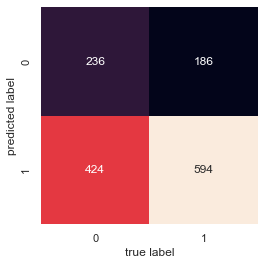

In [12]:
#Below I played around with neural nets, didn't find anything better than the logistic regression. This honestly makes sense,
#it would be strange to be able to predict too much of customer behaviour based on just a first order...


import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import  train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import fetch_openml
sns.set()


X_train, X_test, y_train, y_test = train_test_split(Xlog, Ylog, test_size=0.33, random_state=42)


nn = MLPClassifier(
    hidden_layer_sizes=[50, 20, 10], 
    activation='relu', solver='adam', 
    alpha=0.0001, batch_size='auto', 
    learning_rate='constant', # adaptive
    learning_rate_init=0.001, power_t=0.5, max_iter=200, shuffle=True, 
    random_state=None, tol=0.0001, verbose=False, warm_start=False, 
    momentum=0.9, nesterovs_momentum=True, early_stopping=False, 
    validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08, 
    n_iter_no_change=10, max_fun=15000)
nn.fit(X_train, y_train)

pred = nn.predict(X_test)

print(f"accuracy_score {accuracy_score(y_test, pred)}")

mat = confusion_matrix(y_test, pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')

In [13]:
import numpy as np
import tensorflow
from tensorflow import keras
from tensorflow.keras import layers




num_classes = 2
input_shape = (17)
batch_size = 50
epochs = 15

X_train, X_test, y_train, y_test = train_test_split(Xlog, Ylog, test_size=0.3, random_state=0)

# convert class vectors to one-hot class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

initializer = keras.initializers.RandomNormal(mean=0.0, stddev=0.01, seed=None)
# The actual neural net model
model = keras.Sequential(
    [
        # Input layer
        keras.Input(shape=input_shape),
        # Hidden layers
        layers.BatchNormalization(),

        layers.Dense(15, activation="relu"),
        #layers.Dropout(rate = 0.5),
        layers.Dense(10, activation="relu"),
        layers.Dense(5, activation="relu"),
        layers.Dense(3, activation="relu"),
        layers.Dropout(rate = 0.5),
        # Note the output shape is the number of classes
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)
score = model.evaluate(X_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization (BatchN  (None, 17)               68        
 ormalization)                                                   
                                                                 
 dense (Dense)               (None, 15)                270       
                                                                 
 dense_1 (Dense)             (None, 10)                160       
                                                                 
 dense_2 (Dense)             (None, 5)                 55        
                                                                 
 dense_3 (Dense)             (None, 3)                 18        
                                                                 
 dropout (Dropout)           (None, 3)                 0         
                                                        